In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

from src.data import DataLoader
from src.data.preprocess import extend_market_data

In [2]:
SRW = yf.Ticker("ZW=F")
SRW_data = SRW.history(start ="2014-01-01").drop(['Dividends', 'Stock Splits'], axis=1)
market_data = extend_market_data(SRW_data)

In [3]:
market_data

,Open,High,Low,Close,Volume,Year,Month,Day,Day_Of_Year,expiry,...,High-Close,Low-Close,TR,14D_ATR,Volume_Volatility_Ratio,14D_RSI,7D_MA,14D_MA,7D_EMA,14D_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,605.00,605.25,595.50,597.00,39720,2014,1,2,2,2014-03-14,...,NaN,NaN,9.75,NaN,NaN,NaN,NaN,NaN,597.000000,597.000000
2014-01-03,596.75,609.00,596.00,605.75,49188,2014,1,3,3,2014-03-14,...,12.00,1.00,13.00,NaN,NaN,NaN,NaN,NaN,599.187500,598.166667
2014-01-06,608.00,612.75,605.00,605.75,39432,2014,1,6,6,2014-03-14,...,7.00,0.75,7.75,NaN,NaN,NaN,NaN,NaN,600.828125,599.177778
2014-01-07,606.50,610.00,601.75,602.50,45799,2014,1,7,7,2014-03-14,...,4.25,4.00,8.25,NaN,NaN,NaN,NaN,NaN,601.246094,599.620741
2014-01-08,603.00,607.25,586.75,588.75,55310,2014,1,8,8,2014-03-14,...,4.75,15.75,20.50,NaN,NaN,NaN,NaN,NaN,598.122070,598.171309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-21,557.75,563.00,553.25,558.25,47008,2025,3,21,80,2025-05-14,...,5.75,4.00,9.75,11.321429,2.734953e+06,63.358779,557.928571,546.464286,556.678753,554.384586
2025-03-24,561.25,563.00,545.25,548.25,53647,2025,3,24,83,2025-05-14,...,4.75,13.00,17.75,11.410714,3.293163e+06,65.699208,558.071429,548.589286,554.571565,553.566641
2025-03-25,548.00,549.50,541.00,543.25,57054,2025,3,25,84,2025-05-14,...,1.25,7.25,8.50,10.875000,3.652391e+06,57.142857,557.714286,549.482143,551.741173,552.191089


In [4]:
dl = DataLoader()
production_raw = dl.get_production_data("WHEAT", 2014, True, raw=True)

In [5]:
production_national = production_raw[
    (production_raw.unit_desc == 'BU') &
    (production_raw.short_desc == 'WHEAT - PRODUCTION, MEASURED IN BU') &
    (production_raw.domain_desc == 'TOTAL')
][['state_name', 'Value', 'unit_desc', 'year', 'source_desc', 'short_desc']]

production_national['year'] = pd.to_numeric(production_national['year'])
production_national['Value'] = production_national['Value'].str.replace(',', '', regex=True)
production_national['Value'] = pd.to_numeric(production_national['Value'], errors='coerce')

production_national = production_national.groupby(by ='year').agg({'Value': 'mean'})
production_national.rename(columns={'Value': 'Production'}, inplace = True)
production_national

,Production
year,
2014,2.015884e+09
2015,2.115288e+09
2016,2.296725e+09
2017,1.757082e+09
2018,1.881198e+09
2019,1.944408e+09
2020,1.826966e+09
2021,1.696360e+09
2022,1.730126e+09


In [6]:
production_state_raw = dl.get_production_data("WHEAT", 2014, raw=True)
production_state = production_state_raw[
    (production_state_raw.unit_desc == 'BU') &
    (production_state_raw.class_desc == 'WINTER') &
#    ((production_state_raw.class_desc == 'WINTER') | (production_state_raw.class_desc == 'ALL CLASSES')) &
    (production_state_raw.domaincat_desc == 'NOT SPECIFIED') &
    (production_state_raw.short_desc == 'WHEAT, WINTER - PRODUCTION, MEASURED IN BU')
][['state_name', 'Value', 'unit_desc', 'year', 'source_desc', 'class_desc', 'reference_period_desc', 'short_desc']]

production_state['year'] = pd.to_numeric(production_state['year'])
production_state['Value'] = production_state['Value'].str.replace(',', '', regex=True)
production_state['Value'] = pd.to_numeric(production_state['Value'], errors='coerce')
# production_state

([<matplotlib.patches.Wedge at 0x15fc8e180>,
 [Text(0.8612070158237694, 0.6843409061980134, 'KANSAS'),
  Text(-0.11121373944850914, 1.0943635155458535, 'WASHINGTON'),
  Text(-0.6261903332722272, 0.9043703149243772, 'OKLAHOMA'),
  Text(-0.8958764671756616, 0.6382831311893303, 'IDAHO'),
  Text(-1.0575735213610251, 0.30255288284206017, 'MONTANA'),
  Text(-1.0997929837197296, -0.021339938164265857, 'ILLINOIS'),
  Text(-1.0588135292680791, -0.29818435612700184, 'OTHER STATES'),
  Text(-0.9542127505175882, -0.5472458558542578, 'OREGON'),
  Text(-0.8045158042915961, -0.7501695279368834, 'COLORADO'),
  Text(-0.6259730290591881, -0.9045207387840618, 'TEXAS'),
  Text(-0.43205468511577466, -1.0115971278475977, 'MISSOURI'),
  Text(-0.23080313550901935, -1.0755137900739373, 'SOUTH DAKOTA'),
  Text(-0.024950878384638307, -1.099716987987289, 'OHIO'),
  Text(0.17506449193419688, -1.0859799370447971, 'MICHIGAN'),
  Text(0.35575098932242405, -1.0408848320520943, 'NEBRASKA'),
  Text(0.5169476325327393, -

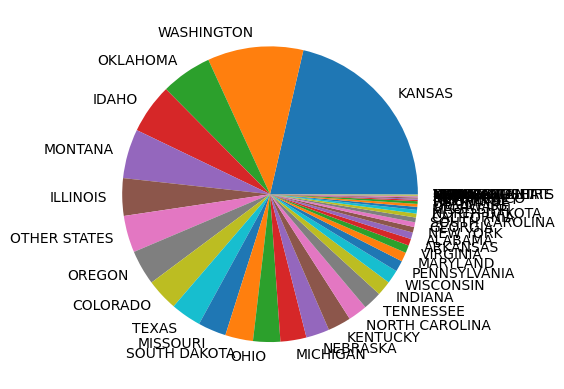

In [7]:
production_2022 = production_state[(production_state.year == 2022)].groupby(by ='state_name').agg({'Value': 'mean'}).sort_values('Value', ascending=False).dropna()
plt.pie(production_2022['Value'], labels=production_2022['Value'].index)

In [8]:
states_of_interest = production_2022[:11].index.tolist()
states_of_interest.remove('OTHER STATES')
states_of_interest

['KANSAS',
 'WASHINGTON',
 'OKLAHOMA',
 'IDAHO',
 'MONTANA',
 'ILLINOIS',
 'OREGON',
 'COLORADO',
 'TEXAS',
 'MISSOURI']

In [9]:
stocks_national_raw = dl.get_stocks_data('WHEAT', 2014, True)
stocks_national_raw['end_month'] = stocks_national_raw['end_month'].astype(int)
stocks_national = stocks_national_raw[['year', 'end_month', 'WHEAT - STOCKS, MEASURED IN BU', 'WHEAT, OFF FARM - STOCKS, MEASURED IN BU', 'WHEAT, ON FARM - STOCKS, MEASURED IN BU']]
# stocks_national.index.name = 'id'
stocks_national = stocks_national.rename(columns={
    'WHEAT - STOCKS, MEASURED IN BU': 'Total',
    'WHEAT, ON FARM - STOCKS, MEASURED IN BU': 'ON_FARM',
    'WHEAT, OFF FARM - STOCKS, MEASURED IN BU': 'OFF_FARM',
})
stocks_national

short_desc,year,end_month,Total,OFF_FARM,ON_FARM
0,2014,3,1056965000,819435000,237530000
1,2014,6,590283000,493288000,96995000
2,2014,9,1907220000,1193770000,713450000
3,2014,12,1529630000,1056830000,472800000
4,2015,3,1140407000,861697000,278710000
5,2015,6,752394000,597224000,155170000
6,2015,9,2097089000,1446889000,650200000
7,2015,12,1745907000,1242457000,503450000
8,2016,3,1371662000,1051862000,319800000
9,2016,6,975603000,778393000,197210000


In [12]:
condition_state_raw = dl.get_condition_data('WHEAT', 2018, national_level=False, raw=True)

condition_state_raw['year'] = pd.to_numeric(condition_state_raw['year'])
# condition_national_raw['Value'] = condition_national_raw['Value'].str.replace(',', '', regex=True)
condition_state_raw['Value'] = pd.to_numeric(condition_state_raw['Value'], errors='coerce')
raw_data = condition_state_raw[condition_state_raw.class_desc == 'WINTER']

condition_state = raw_data.pivot(index=['week_ending', 'year', 'state_name', 'end_code'], columns='unit_desc', values='Value').reset_index().set_index('week_ending')
condition_state.rename(columns={'end_code': 'week_number'}, inplace=True)

# Due to the API constrain, we get the data for 2014-2018 separately, and combine them together
for year in range(2014, 2018):
    condition_state_raw = dl.get_condition_data('WHEAT', 2014, exact_year=year, national_level=False, raw=True)

    condition_state_raw['year'] = pd.to_numeric(condition_state_raw['year'])
    # condition_national_raw['Value'] = condition_national_raw['Value'].str.replace(',', '', regex=True)
    condition_state_raw['Value'] = pd.to_numeric(condition_state_raw['Value'], errors='coerce')
    raw_data = condition_state_raw[condition_state_raw.class_desc == 'WINTER']

    condition_state_year = raw_data.pivot(index=['week_ending', 'year', 'state_name', 'end_code'], columns='unit_desc', values='Value').reset_index().set_index('week_ending')
    condition_state_year.rename(columns={'end_code': 'week_number'}, inplace=True)
    condition_state = pd.concat([condition_state_year, condition_state], axis=0)
condition_state.sort_index(inplace=True)
condition_state

unit_desc,year,state_name,week_number,PCT EXCELLENT,PCT FAIR,PCT GOOD,PCT POOR,PCT VERY POOR
week_ending,,,,,,,,
2013-10-20,2014,ARKANSAS,42,2.0,35.0,56.0,4.0,3.0
2013-10-20,2014,WASHINGTON,42,6.0,29.0,62.0,3.0,0.0
2013-10-20,2014,TEXAS,42,5.0,28.0,62.0,3.0,2.0
2013-10-20,2014,SOUTH DAKOTA,42,12.0,23.0,63.0,2.0,0.0
2013-10-20,2014,OREGON,42,4.0,11.0,81.0,4.0,0.0
...,...,...,...,...,...,...,...,...
2025-03-23,2025,COLORADO,12,9.0,25.0,57.0,6.0,3.0
2025-03-23,2025,KANSAS,12,6.0,34.0,43.0,13.0,4.0
2025-03-23,2025,LOUISIANA,12,1.0,35.0,64.0,0.0,0.0


# Put all data together to a dataframe

In [13]:
data = market_data.copy().reset_index()
for state in states_of_interest:
    # appending the yearly production data of each state
    yearly_production_data = production_state[
        (production_state.state_name==state) &
        (production_state.source_desc=='SURVEY')
    ].pivot(index='year', columns='reference_period_desc', values='Value').reset_index().set_index('year').add_prefix(state+'_')
    data = pd.merge(data, yearly_production_data, how='left', left_on='Year', right_on='year')

    weekly_condition_data = condition_state[
        condition_state.state_name==state
    ][['PCT EXCELLENT', 'PCT FAIR', 'PCT GOOD', 'PCT POOR', 'PCT VERY POOR']].add_prefix(state+'_')
    weekly_condition_data.index = pd.to_datetime(weekly_condition_data.index)

    # appending the weekly condition data
    data=pd.merge(data, weekly_condition_data, how='outer', left_on='Date', right_index=True)

# appending the quarterly stocks data
data = pd.merge(data, stocks_national, how='outer', left_on=['Year', 'Month'], right_on=['year', 'end_month'])

# drop redundant columns, sort by dates, and perform ffill
data = data.drop(['year', 'end_month', 'expiry'], axis=1)
data.sort_values(by='Date', inplace=True)
data = data.ffill(axis=0)

# This will remove the extra date created when merging the tables
data = data[data.Date.isin(market_data.index)]

# Creating the target column, which is the 7day log return
data['7d_log_return'] = np.log(data['Close']/data['Close'].shift(7))
data['Target'] = data['7d_log_return'].shift(-7)

data.dropna(inplace=True)
data

,Date,Open,High,Low,Close,Volume,Year,Month,Day,Day_Of_Year,...,MISSOURI_PCT EXCELLENT,MISSOURI_PCT FAIR,MISSOURI_PCT GOOD,MISSOURI_PCT POOR,MISSOURI_PCT VERY POOR,Total,OFF_FARM,ON_FARM,7d_log_return,Target
40,2014-03-03,610.00,640.00,608.25,626.75,1232.0,2014.0,3.0,3.0,62.0,...,2.0,52.0,45.0,1.0,0.0,1.056965e+09,8.194350e+08,237530000.0,0.016895,0.093241
41,2014-03-04,620.00,640.00,619.00,639.75,439.0,2014.0,3.0,4.0,63.0,...,2.0,52.0,45.0,1.0,0.0,1.056965e+09,8.194350e+08,237530000.0,0.048028,0.059544
42,2014-03-05,637.00,638.50,631.00,637.25,348.0,2014.0,3.0,5.0,64.0,...,2.0,52.0,45.0,1.0,0.0,1.056965e+09,8.194350e+08,237530000.0,0.031078,0.079892
43,2014-03-06,632.50,643.50,631.00,641.50,128.0,2014.0,3.0,6.0,65.0,...,2.0,52.0,45.0,1.0,0.0,1.056965e+09,8.194350e+08,237530000.0,0.042187,0.050162
44,2014-03-07,642.00,655.00,642.00,646.25,139.0,2014.0,3.0,7.0,66.0,...,2.0,52.0,45.0,1.0,0.0,1.056965e+09,8.194350e+08,237530000.0,0.074257,0.069122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,2025-03-12,534.00,538.75,534.00,538.75,3.0,2025.0,3.0,12.0,71.0,...,5.0,27.0,64.0,4.0,0.0,1.569626e+09,1.103046e+09,466580000.0,0.012608,0.035555
2814,2025-03-13,549.00,551.25,547.25,547.25,15.0,2025.0,3.0,13.0,72.0,...,5.0,27.0,64.0,4.0,0.0,1.569626e+09,1.103046e+09,466580000.0,0.053966,0.001826
2815,2025-03-14,545.75,545.75,545.75,545.75,60916.0,2025.0,3.0,14.0,73.0,...,5.0,27.0,64.0,4.0,0.0,1.569626e+09,1.103046e+09,466580000.0,0.027870,-0.004591
2816,2025-03-17,559.00,575.25,559.00,568.50,78721.0,2025.0,3.0,17.0,76.0,...,5.0,27.0,64.0,4.0,0.0,1.569626e+09,1.103046e+09,466580000.0,0.057003,-0.060267
